<a href="https://colab.research.google.com/github/chajunhyeop/-/blob/main/bootmap_and_folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
df = pd.DataFrame(np.random.randn(5,5)) 
#5 by 5 테이블

In [6]:
df

,0,1,2,3,4
0,-1.205988,-1.091243,-0.158545,-0.578813,-0.430896
1,-0.179438,-1.242865,0.475682,1.046222,-1.254108
2,1.947938,0.380678,-1.308310,-0.304674,0.252233
3,1.372441,-0.246432,0.773324,2.260824,-0.465496
4,-0.026201,0.410748,0.567259,0.164835,1.685847


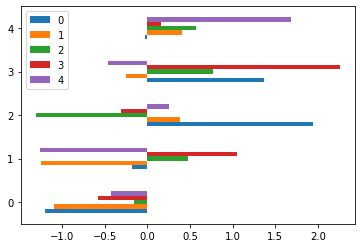

In [8]:
df.plot(kind = "barh")

In [10]:
import seaborn as sns

In [13]:
tips = sns.load_dataset("tips")
#내장데이터 "tips"

In [14]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


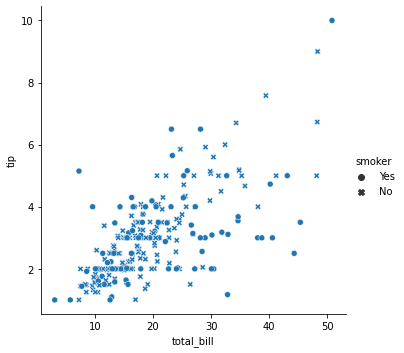

In [16]:
sns.relplot(x= "total_bill", y= "tip", hue = "smoker", style = "smoker", data = tips)

In [17]:
iris = sns.load_dataset("iris")

In [18]:
penguins = sns.load_dataset("penguins")

In [19]:
x = iris["sepal_length"]

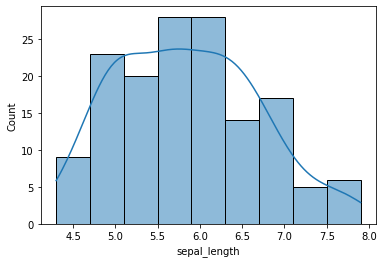

In [24]:
sns.histplot(x=x,kde=True)

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


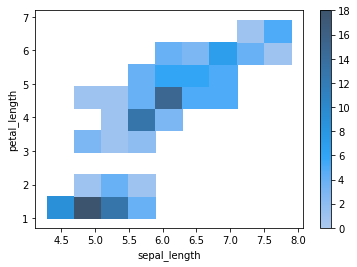

In [28]:
sns.histplot(data = iris, x = "sepal_length", y = "petal_length", cbar = True)

In [25]:
penguins.head() 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


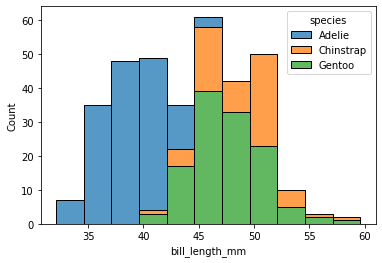

In [29]:
sns.histplot(data=penguins, x = "bill_length_mm", hue = "species", multiple = "stack")

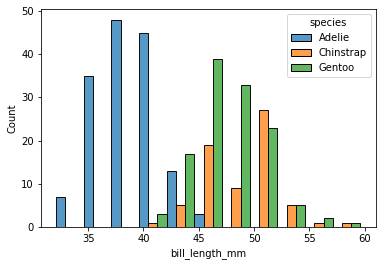

In [26]:
sns.histplot(data=penguins, x = "bill_length_mm", hue = "species", multiple = "dodge")

In [ ]:
sns.histplot(data=penguins, x = "bill_length_mm", hue = "species", multiple = "dodge")

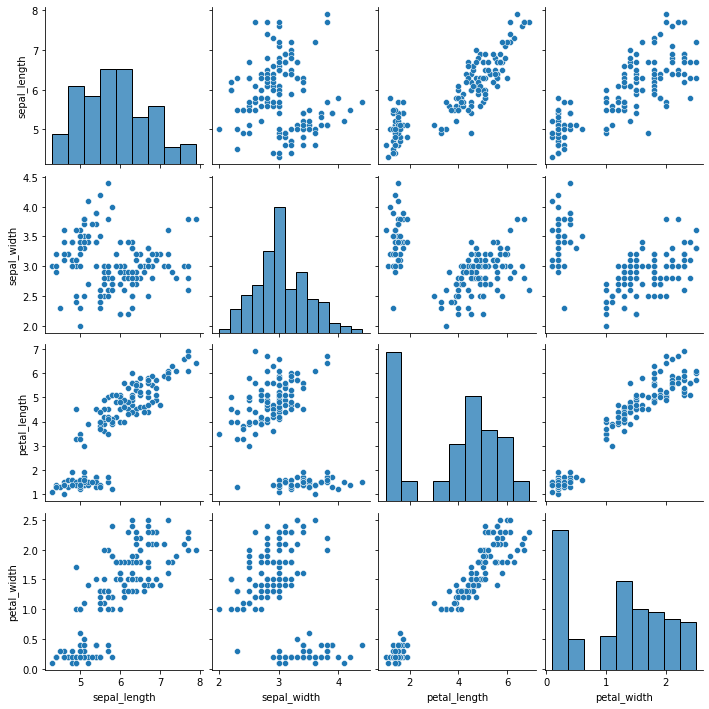

In [30]:
sns.pairplot(iris)

In [31]:
flights = sns.load_dataset("flights")

In [32]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [35]:
flights = flights.pivot("month", "year", "passengers")

In [36]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


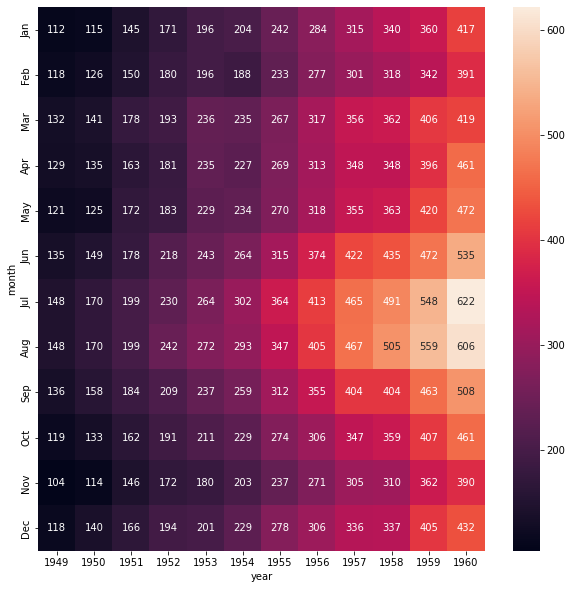

In [40]:
plt.figure(figsize = (10,10))
sns.heatmap(flights, annot = True, fmt = "d")

In [41]:
import folium 
#지도를 띄워주는 패키지

In [51]:
m = folium.Map(location = [37.5665734,126.978179])
folium.Marker(location = [37.5665734,126.978179], popup = "서울시청", icon = folium.Icon(icon_color = "blue")).add_to(m)
folium.Marker(location = [37.5806736,126.976952], popup = "경복궁", icon = folium.Icon(icon_color = "red")).add_to(m)
folium.Marker(location = [37.6500452,127.062199], popup = "우리집", icon = folium.Icon(icon_color = "green")).add_to(m)
folium.Marker(location = [37.4839114,126.900755], popup = "유비온", icon = folium.Icon(icon_color = "yellow")).add_to(m)

In [56]:
center = [37.5665734,126.978179]
m = folium.Map(location = center, zoom_star = 10)

location_data = [37.5665734,126.978179], [37.5806736,126.976952], [37.6500452,127.062199], [37.4839114,126.900755], [37.4839114,126.900755]

In [60]:
folium.Polygon(locations = location_data, tooltip = "PolyLine").add_to(m)

In [63]:
folium.Polygon(locations = location_data, fill = True, tooltip = "PolyLine").add_to(m)

In [64]:
folium.Marker(location = [37.5665734,126.978179], popup = "서울시청", icon = folium.Icon(icon_color = "blue")).add_to(m)
folium.Marker(location = [37.5806736,126.976952], popup = "경복궁", icon = folium.Icon(icon_color = "red")).add_to(m)
folium.Marker(location = [37.6500452,127.062199], popup = "우리집", icon = folium.Icon(icon_color = "green")).add_to(m)
folium.Marker(location = [37.4839114,126.900755], popup = "유비온", icon = folium.Icon(icon_color = "yellow")).add_to(m)
m

In [71]:
folium.Rectangle(bounds = location_data, tooltip = "Rectangle").add_to(m)
#locations 가 아닌 bound 요소 필요

In [70]:
m

In [73]:
folium.Circle([37.5665734,126.978179], radius = 300).add_to(m)

In [74]:
m